# $Unsupervised-Learning$

- it the field of ML in which we deal with data that is unlabelled
- 
- 
- 

Typical Use cases, or examples in which it is used are:
- Customer Segmentation: Group customers based on purchasing behaviour
- Anomaly Detection: Identify unusual patterns in data - including outliers
    - imagine doing this in, fraud detection for credit cards
    - imagine this in network security - in a connection request identity patterns for hacking, or identity patterns for emails that are scam
- Document Clustering: organize documents based on certain themes or topics

Examples where to think of USML:
- how many types of customers are there?
- are there any natural groups in data?
- are there any unusual customers?
- any unusual transactions?
- Can we reduce the dimensions of the data?


## $Clustering$

- is a technique used for organizing data into groups (or clusters) based on similarity
- focuses on whether the data points in a cluster are more similar to each other, than the ones in a different cluster
- 

Example:
- A dataset of **Animals**: size, weight, habitat
- divided into **three clusters**
- Mammals - elephants, lions, humans, whales
- Reptiles - turtles, snakes, crocs, etc
- Birds - parrot, merpati, hornbill, raven

**Methods/Algorithms for Clustering**
1. K-Means Clustering
2. Hierarchical Clustering
3. DBSCAN

### K-Means Clustering

![](https://i.vas3k.ru/7w6.jpg)

Steps of the **algorithm**:
1. **Choosing the number of clusters** - Set a value for k - how many clusters
2. **Initializing centroids** - Take random points and set them as centroids
3. **Assign data points** to the nearest cluster - all data points, have a cluster they are associated with
4. **Re-initialize centroids** - calculating the average of all data points of that cluster
5. **Repeat steps 3 and 4** - untill the centroid is stable at position - convergence is achieved

The centroid is defined as the mean position of all points in a geometric figure
![](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/centroid-formula-1620901411.png)

In [182]:
# Let's implement clustering, on a dataset we already know about
# iris!!!
# use the data from iris dataset, to find out if there are different species in the dataset, and which measurements relate to which species

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [183]:
# get the data

iris = load_iris()

X = pd.DataFrame(iris.data, columns= iris.feature_names)
X.shape
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


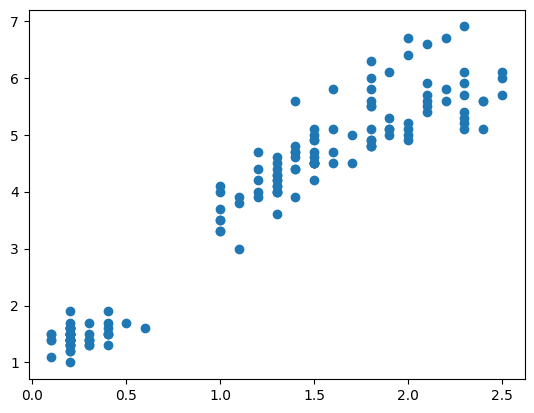

In [184]:

plt.scatter(X['petal width (cm)'], X['petal length (cm)']) # , c=iris.target  ,cmap= 'viridis')
plt.show()

In [185]:
# apply the K-means

kmeans = KMeans(n_clusters=3,
                init= 'k-means++',
                random_state= 42
                )

clusters = kmeans.fit_predict(X)

# this is the predictions from our model
X['clusters'] = clusters

X.head()
# kmeans.inertia_

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


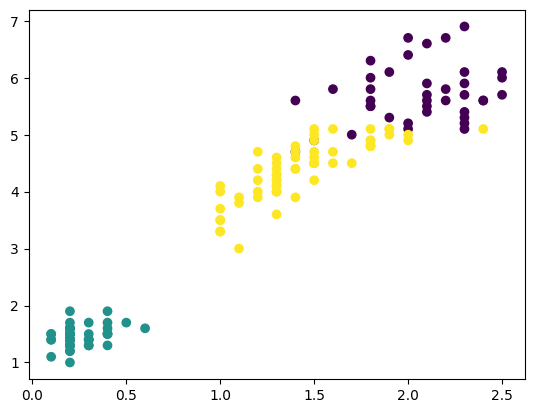

In [186]:
plt.scatter(X['petal width (cm)'], X['petal length (cm)'] , c = X.clusters ,cmap= 'viridis')
plt.show()

# Exercise:
- Create a subplot to compare the groups in real dataset using species
- another plot of groups using the newly created clusters
- within 10 minutes

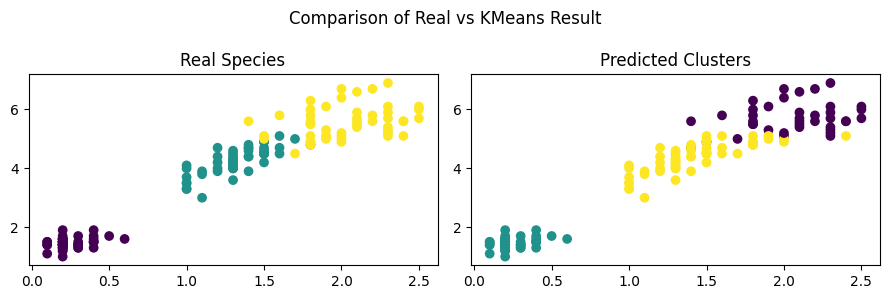

In [187]:
# subplots
fig, ax = plt.subplots(1,2, figsize = (9, 3))
fig.suptitle("Comparison of Real vs KMeans Result")

# real species
ax[0].scatter(X['petal width (cm)'], X['petal length (cm)'] , c=iris.target  ,cmap= 'viridis')
ax[0].set_title("Real Species")


# the predictions of our model
ax[1].scatter(X['petal width (cm)'], X['petal length (cm)'] , c = X.clusters ,cmap= 'viridis')
ax[1].set_title("Predicted Clusters")

plt.tight_layout()
plt.show()

#### Distance Metrics - 
- The formulas used to calculate distances in algorthims that work on the basis of distance:

![](https://tse3.mm.bing.net/th/id/OIP.Rvb0Roe0bnIOTUXlZGjqAgHaDL?rs=1&pid=ImgDetMain&o=7&rm=3)

In [188]:
# Calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

point1 = [0,0]
point2 = [4, 3] # 3, 4 , 5 -- a pythagorean triplet
distance = euclidean_distance(point1, point2)
print(f"Euclidean Distance: {distance}")

Euclidean Distance: 5.0


### How to decide the number of clusters to begin with?
- how do decide k?
- 
1. **Elbow method**
    - is a technique used to choose the best number of clusters for K-Means clustering. 
    - The basic idea is to see how the **inertia (cost)** changes as we increase the number of clusters.
        -  Inertia is the **sum of squared distances** from each data point to the center of its assigned cluster.
            - **Within Cluster Sum of Squares** WCSS 
        - We **plot the inertia for different values of K** i.e different numbers of clusters. 
        - As K increases the inertia decrease because more clusters allow data points to be closer to their cluster centers.
        - The goal is to find the value of K where the decrease in inertia starts to slow down.

2. Silhouette Method
    - measures how similar each data point is to its own cluster compared to other clusters.

3. 

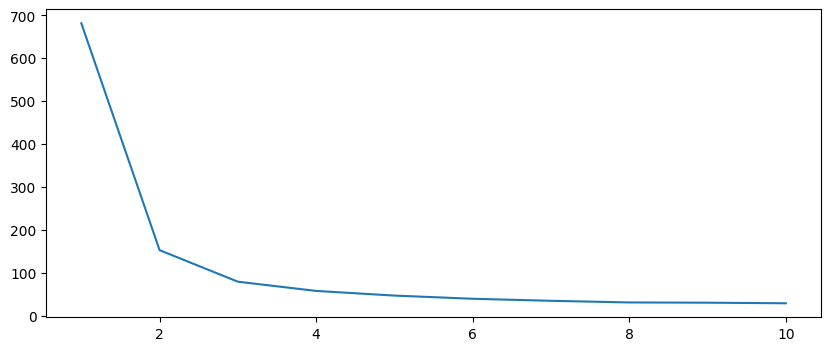

In [189]:
df = X.drop('clusters', axis=1)
df.head()

# this becomes our error/inertia calculation
wcss = []

# elbow method to find an optimal k
for i in range(1, 11): # 1 <= k <= 10
    kmeans = KMeans(n_clusters = i, init= "k-means++", random_state= 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# plot our wcss against the values of different k

plt.figure(figsize=(10,4))
plt.plot(range(1,11), wcss)
plt.show()

In [190]:
# implement kmeans at a value of k = 3
kmeans = kmeans = KMeans(
        n_clusters=3,        # Number of clusters
        init='random',    # Smart centroid initialization
        n_init=10,           # Number of initializations to run - starting point will be different in each case
        max_iter=300,        # Max iterations per run
        random_state=42
    )
df['clusters'] = kmeans.fit_predict(df)

df.groupby('clusters').clusters.count()

clusters
0    50
1    62
2    38
Name: clusters, dtype: int64

In [191]:
# Please create a pairplot based on these new clusterings

import seaborn as sns
# sns.pairplot()


### Exercise 2:
- implement Kmeans clustering on `sns.load_dataset('penguins')`
- you have to extract the numerical features and implement the method on them


## Hierarchical Clustering
1. Agglomerative Clustering
    - data points, treat them a individual clusters
    - calcualte distance between clusters
    - group up the nearest ones
    - keep doing it untill you have one unified supercluster
![](https://www.janbasktraining.com/tutorials/uploads/images/Agglomerative_Clustering__1.jpg)
![](https://i.ytimg.com/vi/XJ3194AmH40/maxresdefault.jpg)

2. Divisive Clustering
    - top down approach
    - cluster, you break it down, based on how far each broken cluster is
![](https://dataaspirant.com/wp-content/uploads/2020/12/17-Hierarchical-Divisive-Clustering.png)


Steps for agglomerative clustering:
- Key Steps:

1. Initialize – Treat each point as an individual cluster.
2. Compute Distances – Calculate pairwise distances between clusters.
3. Merge Closest Clusters – Based on the linkage criterion.
4. Update Distances – Recalculate distances after each merge.
5. Repeat – Continue until the desired number of clusters or threshold is reached.
6. Visualize – Use a **dendrogram** to interpret cluster relationships.

In [192]:
# just an example
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

# scipy
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample data: Spending on two products
data = np.array([
[500, 200],
[550, 180],
[600, 250],
[150, 80],
[200, 100],
[650, 300]
])

# Agglomerative Clustering with 2 clusters
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = model.fit_predict(data)
print("Cluster assignments:", clusters)

Cluster assignments: [0 0 0 1 1 0]


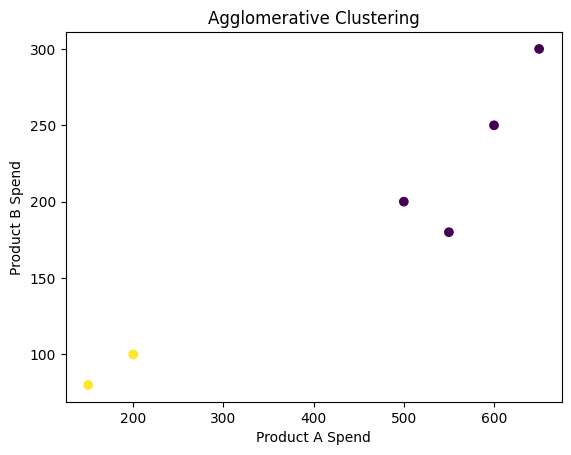

In [193]:
# Scatter plot of clusters
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Product A Spend")
plt.ylabel("Product B Spend")
plt.title("Agglomerative Clustering")
plt.show()

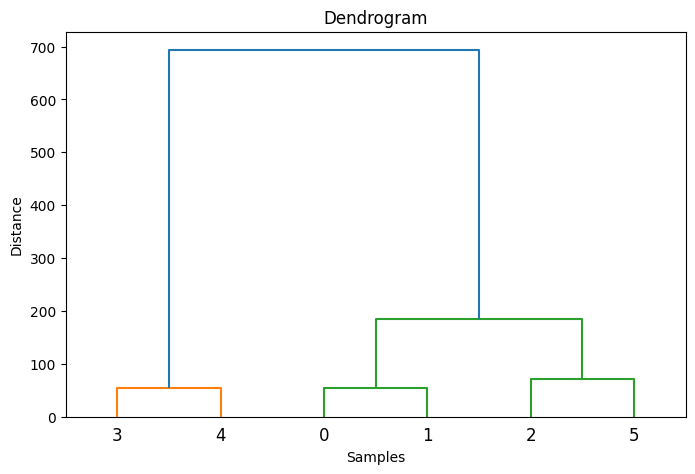

In [194]:
# Dendrogram
Z = linkage(data, method='ward')
plt.figure(figsize=(8, 5))

dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

#### Implement hierarchical clustering on real life datasets as well
- let's implement this on iris



In [195]:
# model
from sklearn.cluster import AgglomerativeClustering

# dendogram visualizatino requirements
from scipy.cluster.hierarchy import dendrogram, linkage

In [196]:
# agglomerative clustering
hc_model = AgglomerativeClustering(n_clusters= 3, linkage= 'ward')
hc_clusters = hc_model.fit_predict(df)

df['hc_clusters'] = hc_clusters
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters,hc_clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [198]:
# observe these visuals as well
# sns.pairplot(df, hue= clusters)

#### Dendograms help us visualise our hierarchical clustering

In [ ]:
df_without_clusters = df.drop(['clusters','hc_clusters'], axis = 1)
df_without_clusters.head(0)
df_without_clusters.shape

(150, 4)

In [ ]:
df_without_clusters.shape


(150, 4)

In [ ]:
labels = [x for x in range(0,150)] # list comprehension
labels = [x  if x% 2== 0 else '' for x in range(0,150)]

In [ ]:
# for all the 150 records, let's print their class names as well
labels012 = iris.target # instead of indexes we will have labels
# we will manually say, if 0 ===> setosa, if 1 ===> virginica, if 2 ===> versicolor

labels = [iris.target_names[label] if index % 2 == 0 else '' for index, label in enumerate(labels012)]

# for index, label in enumerate(labels012): # indexed list of things
#     print(index, label) # index ===> 0 or 1 or 2

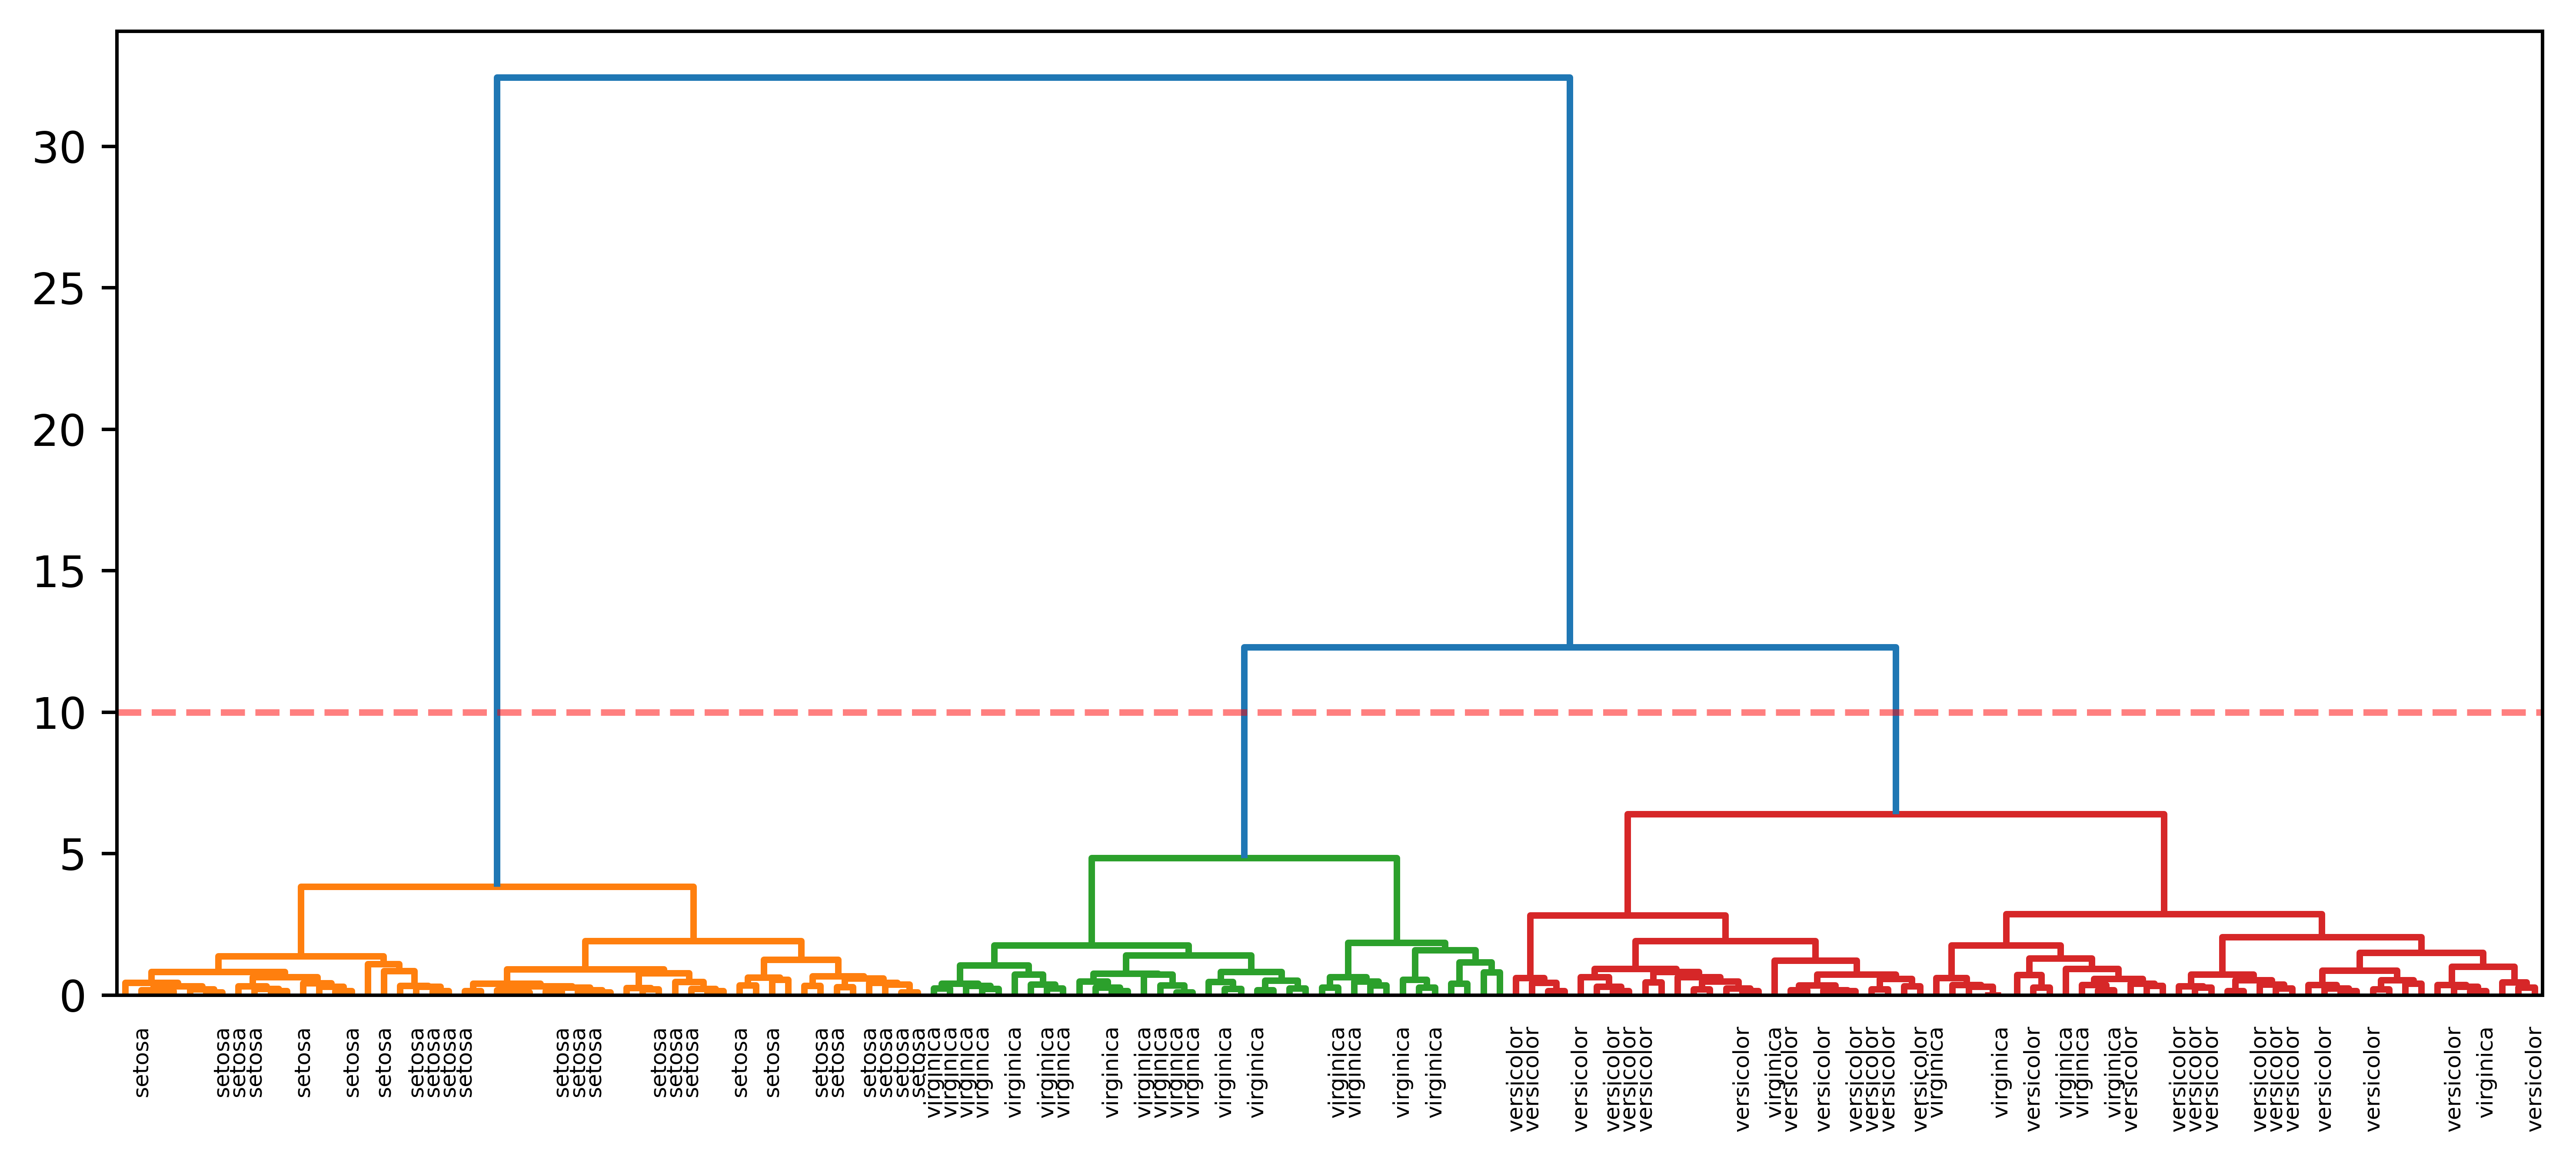

In [ ]:
# dendogram
plt.figure(figsize= (10,4), dpi = 720)
Z = linkage(df_without_clusters, method='ward')
dendrogram(Z, color_threshold = 7, labels = labels)
plt.axhline(y = 10, color  = 'r', linestyle = '--', alpha = 0.5) # axh is the horizontal line 
plt.show()

#### Homework:

### Evaluation of Clustering Results:

1. **Silhouette Score:**
- Measure how similar an object is to its own cluster
- Range: -1 to 1
- Closer to 1, means that point is far from its neighbouring clusters
- Closer to 0, its at the boundary
- 
- **Higher** is better

2. **Davies- Bouldin Index**
- measures the average similarity between clusters
- if similarity is less between clusters, it means they are very different, and farrrrrrrrrrr
- **Lower** values will indicate better clustering

3. **Adjusted Rand Index ARI**
- Compare clustering performance with a known truth
- if you have access to ground truth labels ------- have a labelled Dataset
- look at the similarity --- predicted clusters, and actual labels
- 
- **Higher** is better